# Import Libraries

In [55]:
# Data Processing
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and array handling

# Data Visualization
import matplotlib.pyplot as plt  # Basic visualization tools
import matplotlib.cm as cm
import seaborn as sns  # Advanced visualization tools
sns.set(style="whitegrid")  # Set Seaborn style to "whitegrid"

# Text Data Processing
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity computation

# Utility Tools
from collections import Counter  # For counting elements in data
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap  # For custom color maps

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Loading Files

In [2]:
df_original = pd.read_pickle("/mnt/hdd/bjkim/KISDI/OpenSyllabus/opensyllabus_paper/OA_ALL_2000_2022.pkl")
df = pd.read_pickle("./OA_Tokenized_1226.pkl")

grouped = pd.read_pickle("./Tokenized_grouped.pkl") 
grouped_graduate = pd.read_pickle("./Tokenized_grouped_graduate.pkl")

stm = pd.read_csv("./STM/240227_OpenSyllabus_topic_document.csv")
df2 = pd.read_pickle("./OA_Prep_230918.pkl")

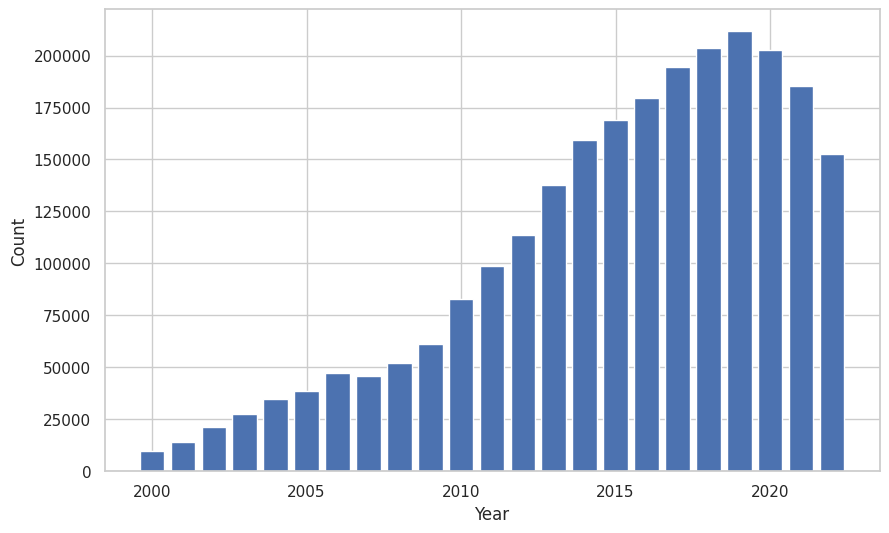

In [4]:
# Appendix A
year_counts = df_original['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

# Temporal changes in lexical composition

In [5]:
def joining(tokens_list):
    return ' '.join(tokens_list)

grouped['joined_description'] = grouped['description_tokens'].apply(joining)
documents=grouped['joined_description']

In [6]:
documents_2004 = documents[[0, 16, 32, 48, 64]]
documents_2005 = documents[[1, 17, 33, 49, 65]]
documents_2006 = documents[[2, 18, 34, 50, 66]]
documents_2007 = documents[[3, 19, 35, 51, 67]]
documents_2008 = documents[[4, 20, 36, 52, 68]]
documents_2009 = documents[[5, 21, 37, 53, 69]]
documents_2010 = documents[[6, 22, 38, 54, 70]]
documents_2011 = documents[[7, 23, 39, 55, 71]]
documents_2012 = documents[[8, 24, 40, 56, 72]]
documents_2013 = documents[[9, 25, 41, 57, 73]]
documents_2014 = documents[[10, 26, 42, 58, 74]]
documents_2015 = documents[[11, 27, 43, 59, 75]]
documents_2016 = documents[[12, 28, 44, 60, 76]]
documents_2017 = documents[[13, 29, 45, 61, 77]]
documents_2018 = documents[[14, 30, 46, 62, 78]]
documents_2019 = documents[[15, 31, 47, 63, 79]]

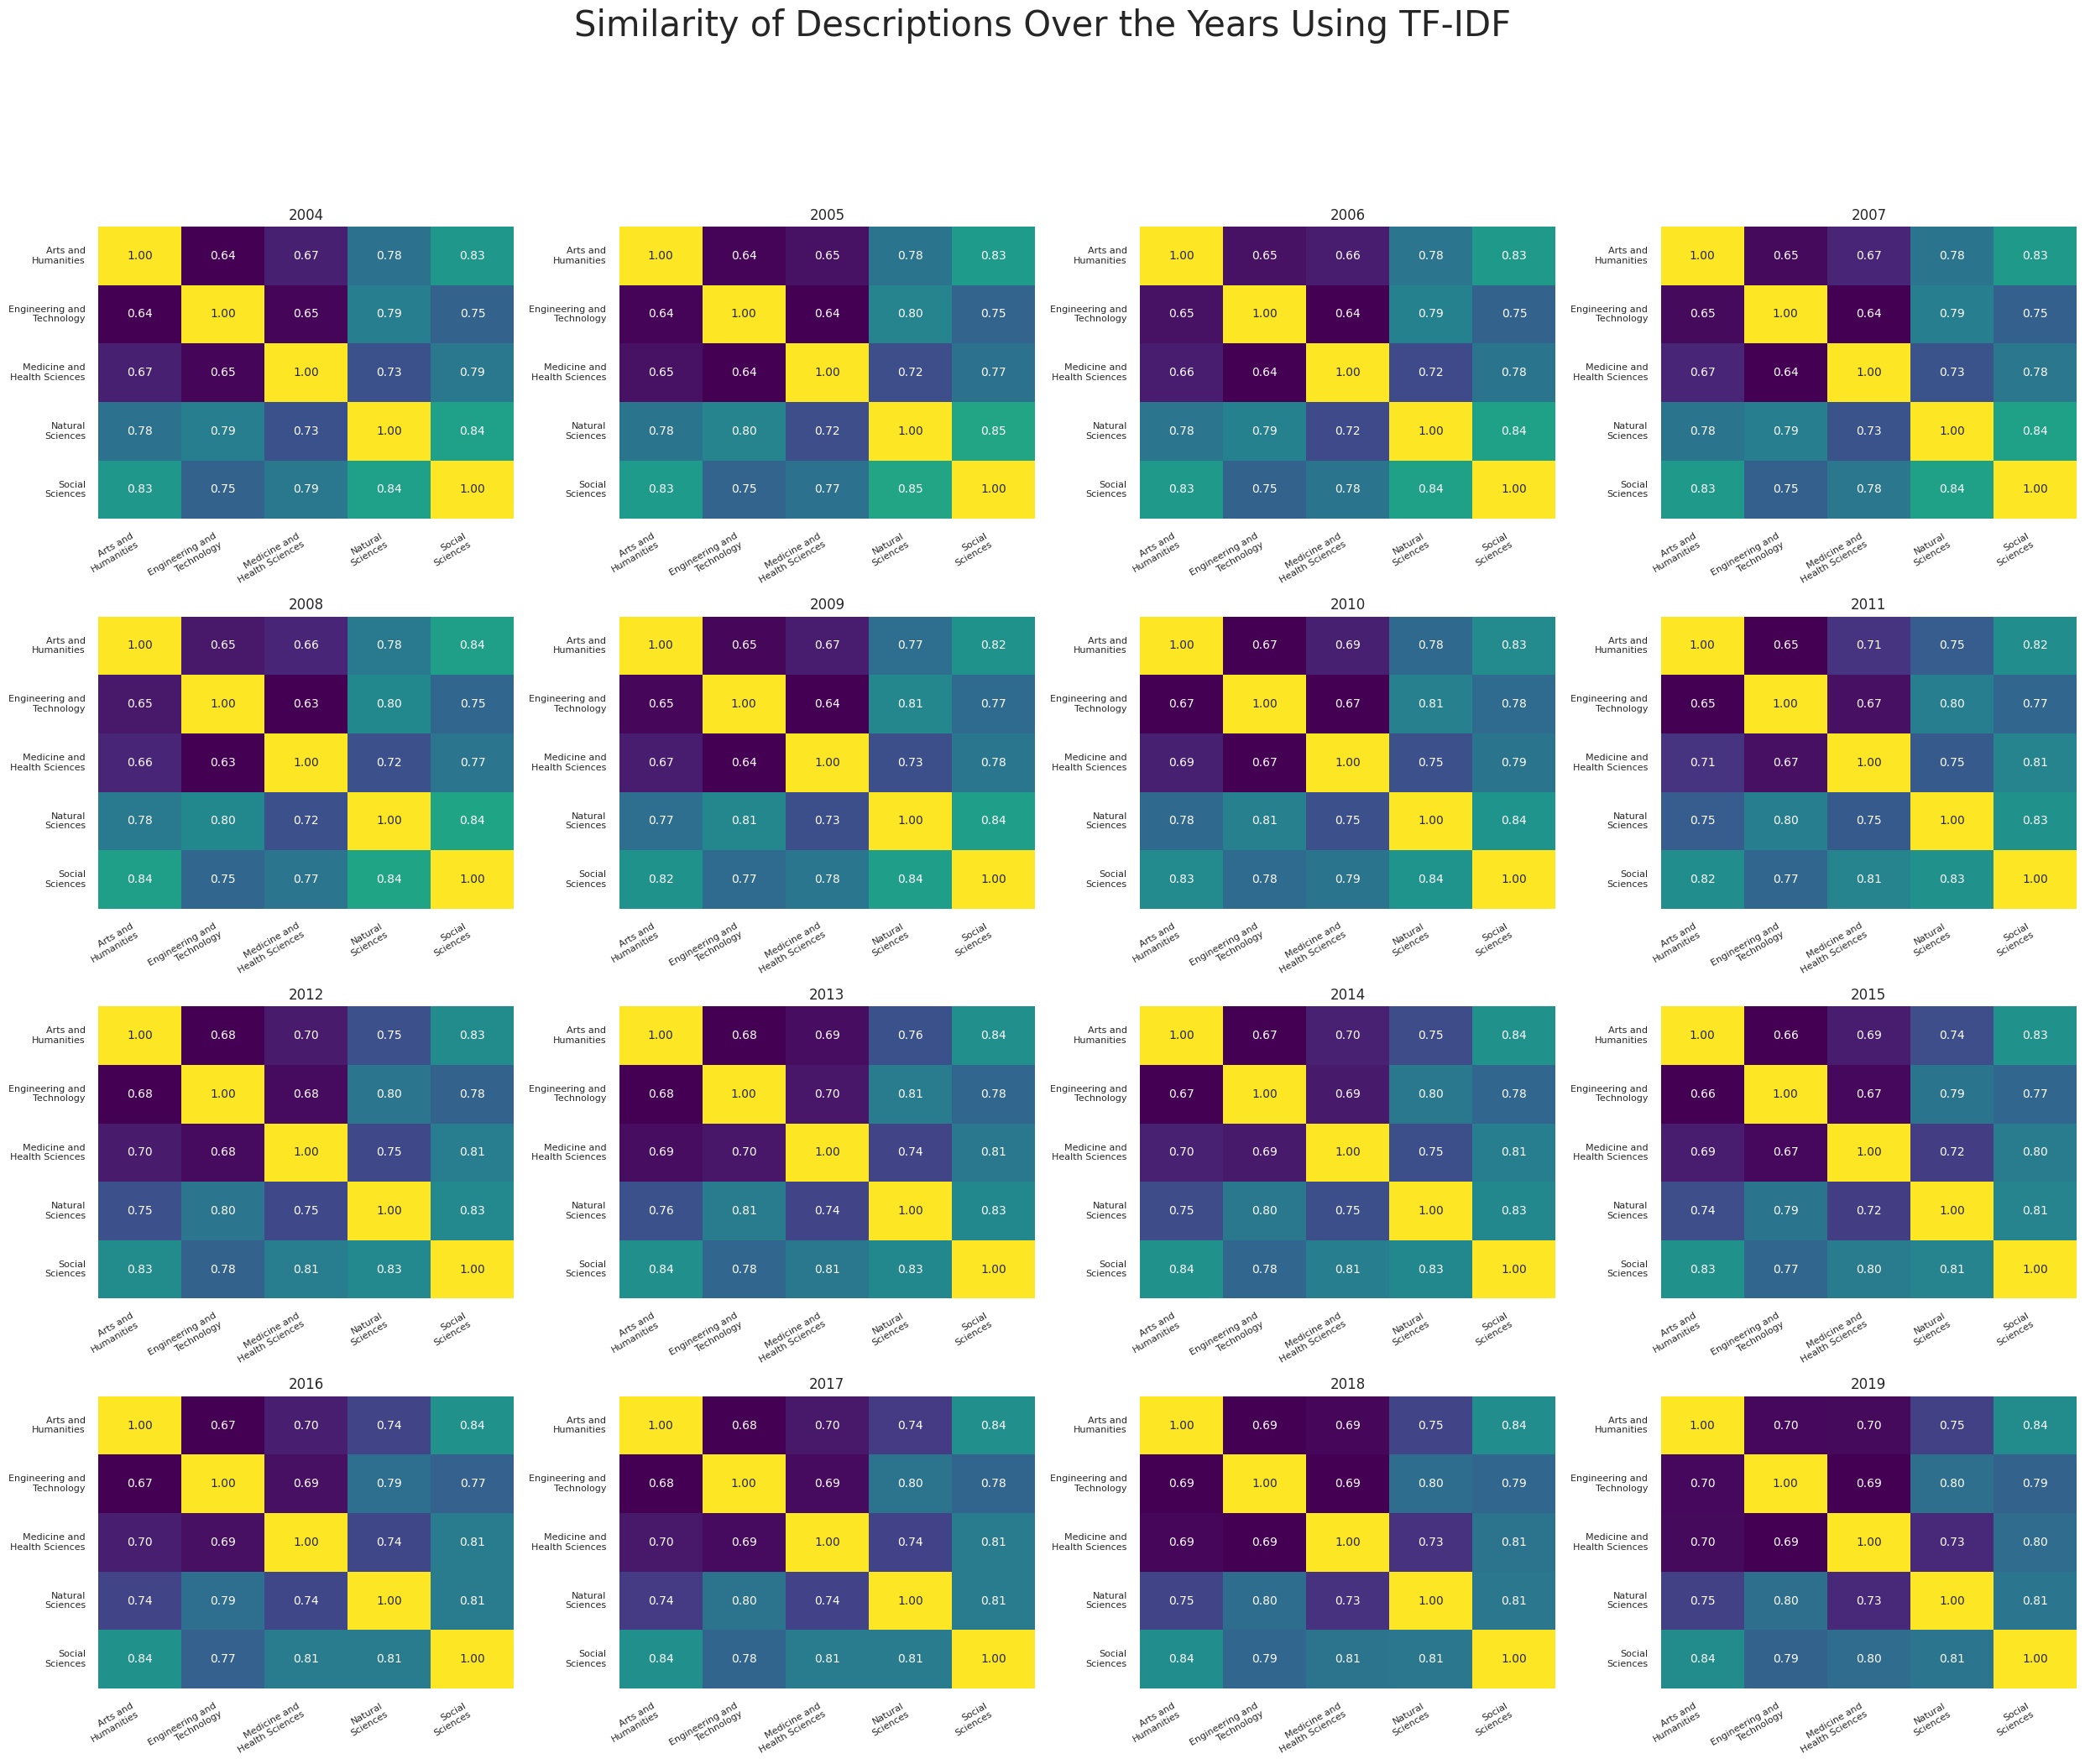

In [7]:
labels = ['Arts and\nHumanities', 'Engineering and\nTechnology', 
          'Medicine and\nHealth Sciences', 'Natural\nSciences', 'Social\nSciences']

# Define the years you want to analyze
years = range(2004, 2020)

# Set up the number of rows and columns for the subplots grid
n_rows = 4  # Adjust based on the number of years
n_cols = 4  # Adjust based on the number of years
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 20))  # Adjust figure size as needed
fig.suptitle("Similarity of Descriptions Over the Years Using TF-IDF", fontsize=30, y=1.05)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

for idx, year in enumerate(years):
    # Retrieve documents for the year dynamically
    documents = eval(f'documents_{year}')
    
    # TF-IDF and cosine similarity calculations
    tfidfv = TfidfVectorizer().fit(documents)
    tfidf_matrix = tfidfv.transform(documents).toarray()
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Plot the heatmap on the respective subplot
    ax = sns.heatmap(
        cosine_sim_matrix, 
        annot=True, 
        cmap='viridis', 
        fmt=".2f",
        xticklabels=labels, 
        yticklabels=labels,
        annot_kws={"size": 10},  # Adjust font size for annotations
        cbar=False,              # Remove color bar for each subplot
        ax=axes[idx]
    )
    
    # Customize each subplot
    ax.tick_params(axis='x', labelsize=8, rotation=30, pad=5)
    ax.tick_params(axis='y', labelsize=8, rotation=30, pad=5)
    ax.set_title(f"{year}", fontsize=12)
    ax.set_xticklabels(labels, rotation=30, ha="right")  # Rotate x labels for readability
    ax.set_yticklabels(labels, rotation=0)               # Rotate y labels for readability

# Hide any unused subplots (if total years < n_rows * n_cols)
for ax in axes[len(years):]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust top to fit main title
plt.show()


In [8]:
# TF-IDF
documents = grouped['joined_description']
corpus = documents
tfidfv = TfidfVectorizer().fit(corpus)
tfidf_matrix =tfidfv.transform(corpus).toarray()
cosine_sim_matrix_TFIDF = cosine_similarity(tfidf_matrix, tfidf_matrix)

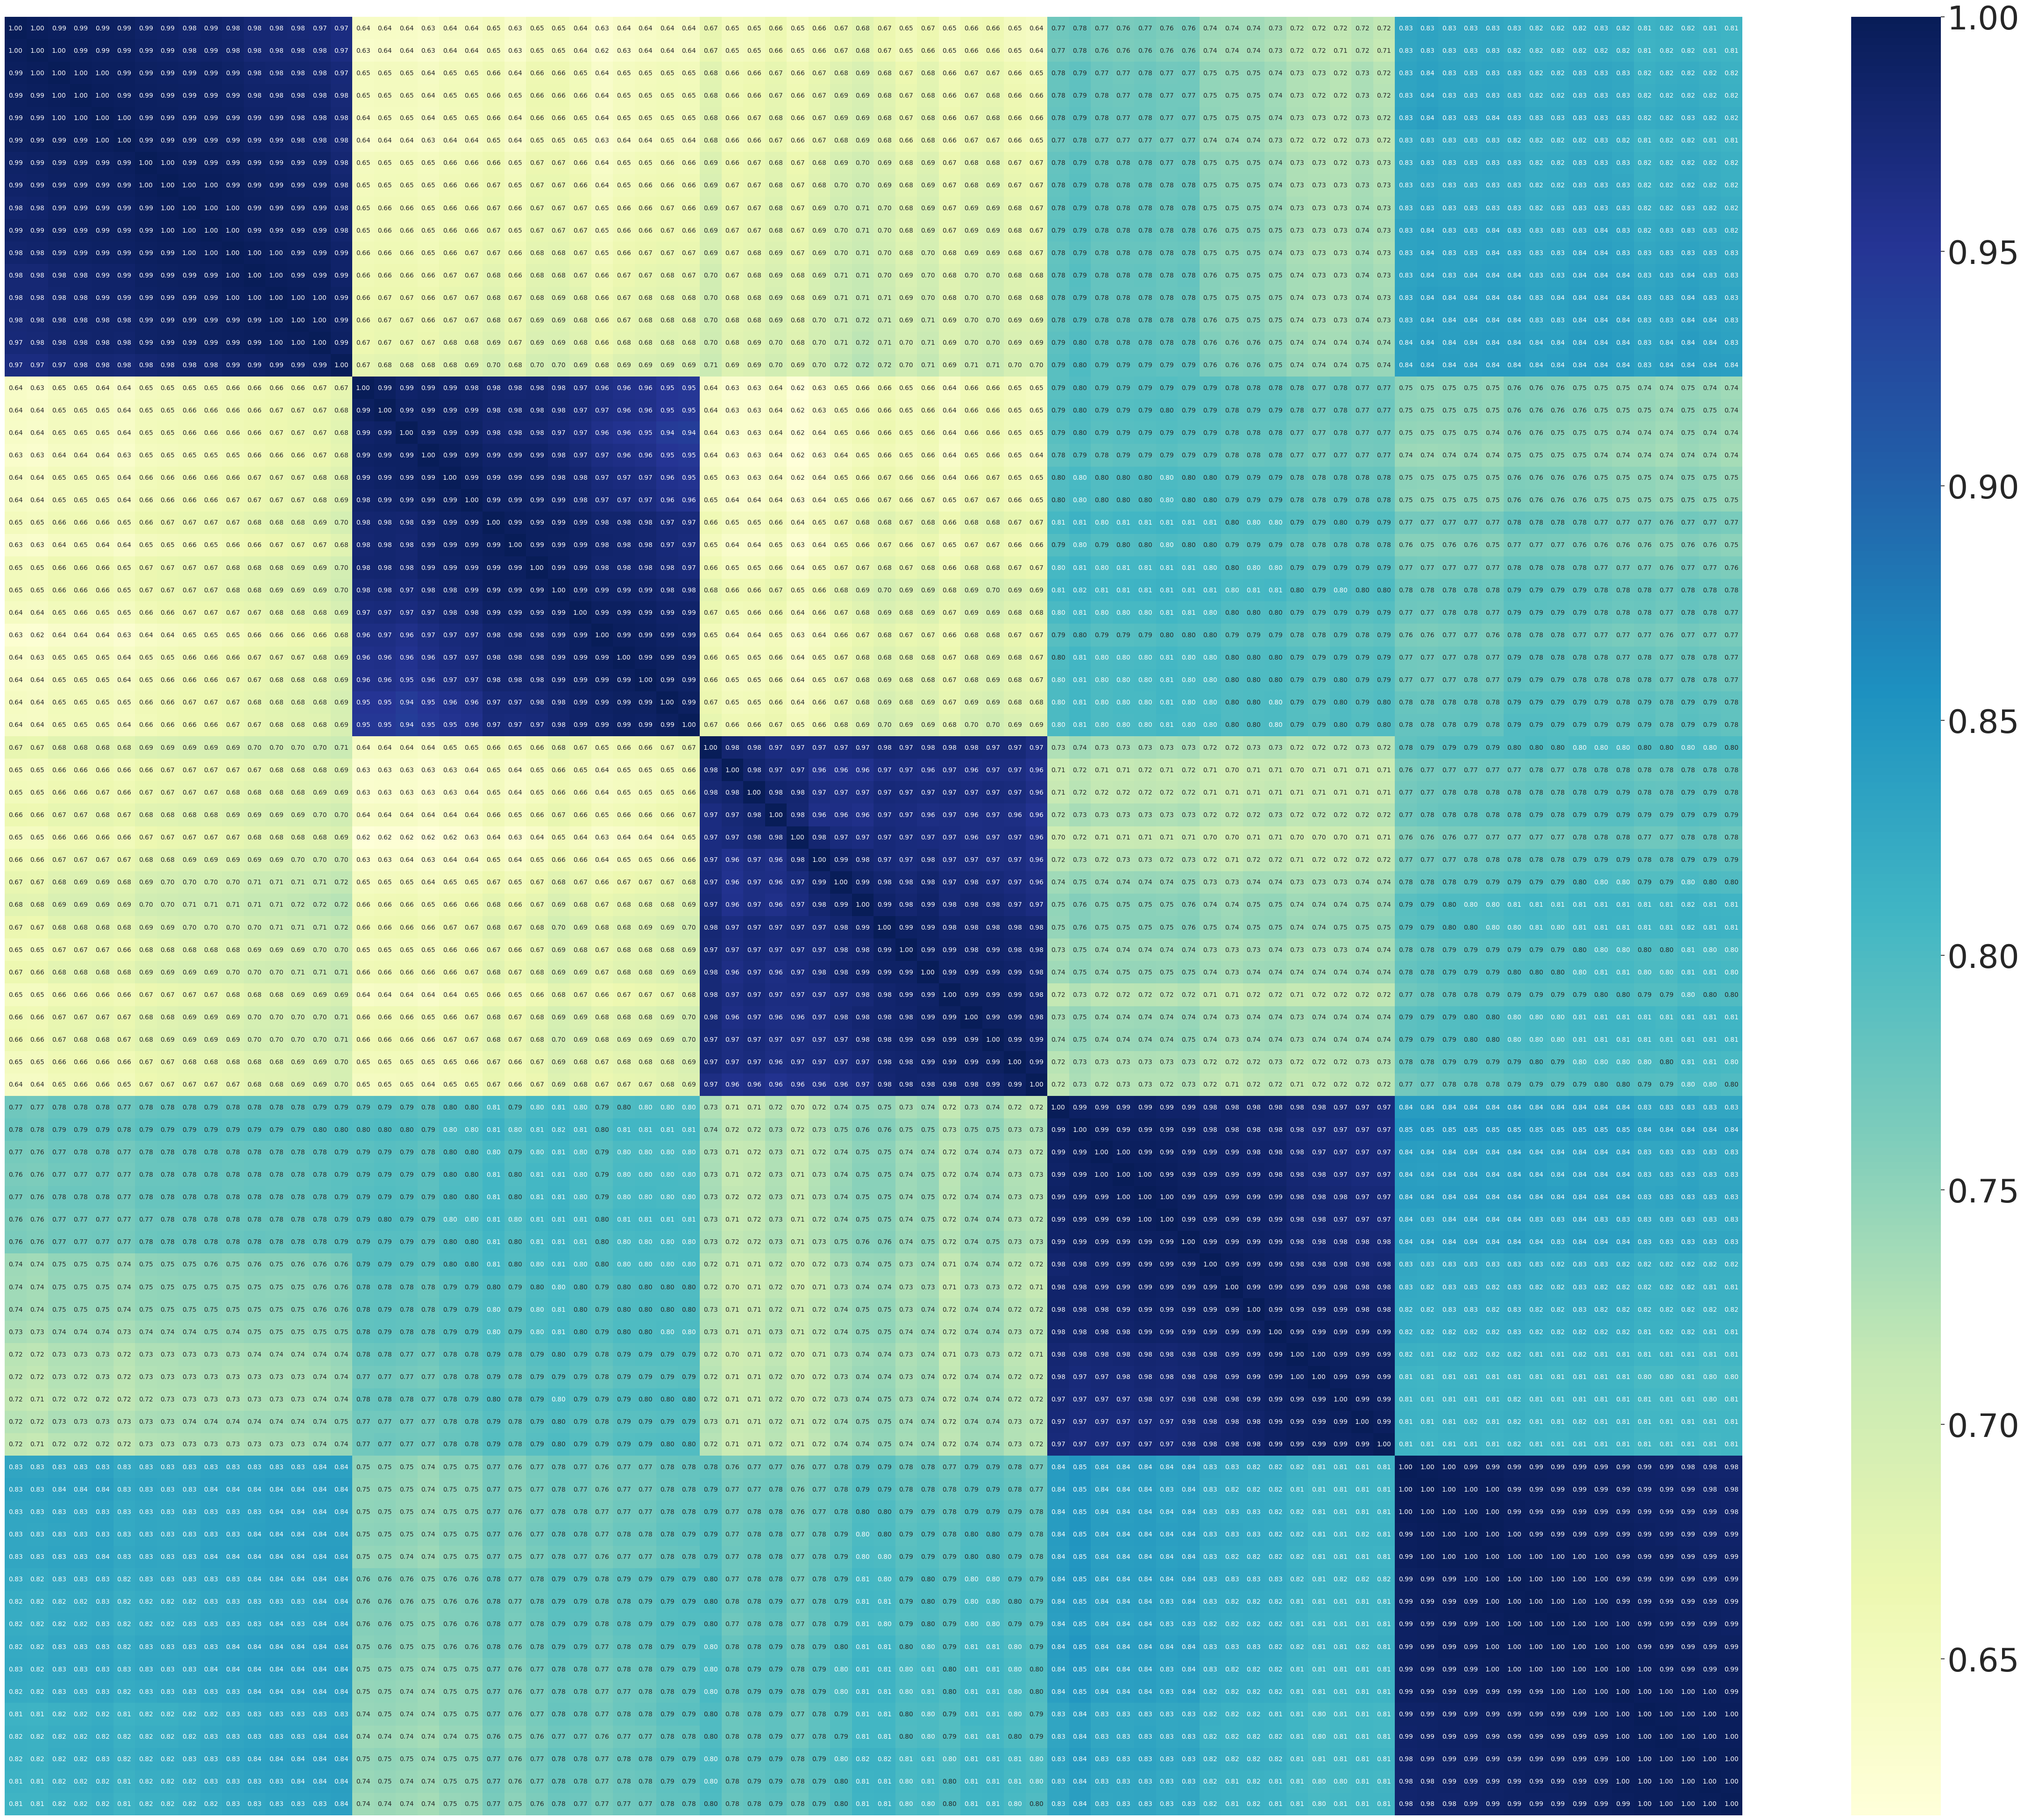

In [9]:
labels = ['Arts and\nHumanities', 'Engineering and\nTechnology', 
          'Medicine and\nHealth Sciences', 'Natural\nSciences', 'Social\nSciences']

plt.figure(figsize=(60,50)) 
heatmap = sns.heatmap(cosine_sim_matrix_TFIDF, annot=True, cmap='YlGnBu', fmt=".2f",
                      xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=50)
plt.xticks([])
plt.yticks([])
plt.show()

## Grouped_Gradute

In [15]:
grouped_graduate.head()

category  year  graduate  \
0  Arts and Humanities  2004        -1   
1  Arts and Humanities  2004         0   
2  Arts and Humanities  2004         1   
3  Arts and Humanities  2005        -1   
4  Arts and Humanities  2005         0   

                                        title_tokens  \
0  [class, guitar, first_year, writing, seminar, ...   
1  [greek, historiography, introduction, evangeli...   
2  [marriage_family, therapy, internship, jane, a...   
3  [prophecy, ancient, israel, world, civilizatio...   
4  [stranger, creative, tension, language, learna...   

                                  description_tokens  \
0  [lecture_demonstration, teaching, method, stud...   
1  [course, capstone, experience, classical, civi...   
2  [student, practical, experience, client, care,...   
3  [prophecy, subject, misconception, biblical, p...   
4  [jews, resilience, ambient, contempt, country,...   

                                     combined_tokens  \
0  [class, guitar, first_year, writing, seminar, ...   
1  [greek, historiography, introduction, evangeli...   
2  [marriage_family, therapy, internship, jane, a...   
3  [prophecy, ancient, israel, world, civilizatio...   
4  [stranger, creative, tension, language, learna...   

                                  joined_description  
0  lecture_demonstration teaching method student ...  
1  course capstone experience classical civilizat...  
2  student practical experience client care respo...  
3  prophecy subject misconception biblical prophe...  
4  jews resilience ambient contempt country arriv...

In [11]:
def joining(tokens_list):
    return ' '.join(tokens_list)

# Apply the function to each row in the 'description_tokens' column
grouped_graduate['joined_description'] = grouped_graduate['description_tokens'].apply(joining)

In [12]:
documents_gradute=grouped_graduate['joined_description']

In [13]:
documents_12 = grouped_graduate[grouped_graduate['graduate']==-1]['joined_description']
documents_34 = grouped_graduate[grouped_graduate['graduate']==0]['joined_description']
documents_grad = grouped_graduate[grouped_graduate['graduate']==1]['joined_description']

documents_12 = documents_12.reset_index(drop=True)
documents_34 = documents_34.reset_index(drop=True)
documents_grad = documents_grad.reset_index(drop=True)

In [14]:
documents_grad_2004 = documents_grad[[0,16,32,48,64]]
documents_grad_2005 = documents_grad[[1,17,33,49,65]]
documents_grad_2006 = documents_grad[[2,18,34,50,66]]
documents_grad_2007 = documents_grad[[3,19,35,51,67]]
documents_grad_2008 = documents_grad[[4,20,36,52,68]]
documents_grad_2009 = documents_grad[[5,21,37,53,69]]
documents_grad_2010 = documents_grad[[6,22,38,54,70]]
documents_grad_2011 = documents_grad[[7, 23, 39, 55, 71]]
documents_grad_2012 = documents_grad[[8, 24, 40, 56, 72]]
documents_grad_2013 = documents_grad[[9, 25, 41, 57, 73]]
documents_grad_2014 = documents_grad[[10, 26, 42, 58, 74]]
documents_grad_2015 = documents_grad[[11, 27, 43, 59, 75]]
documents_grad_2016 = documents_grad[[12, 28, 44, 60, 76]]
documents_grad_2017 = documents_grad[[13, 29, 45, 61, 77]]
documents_grad_2018 = documents_grad[[14, 30, 46, 62, 78]]
documents_grad_2019 = documents_grad[[15,31,47,63,79]]

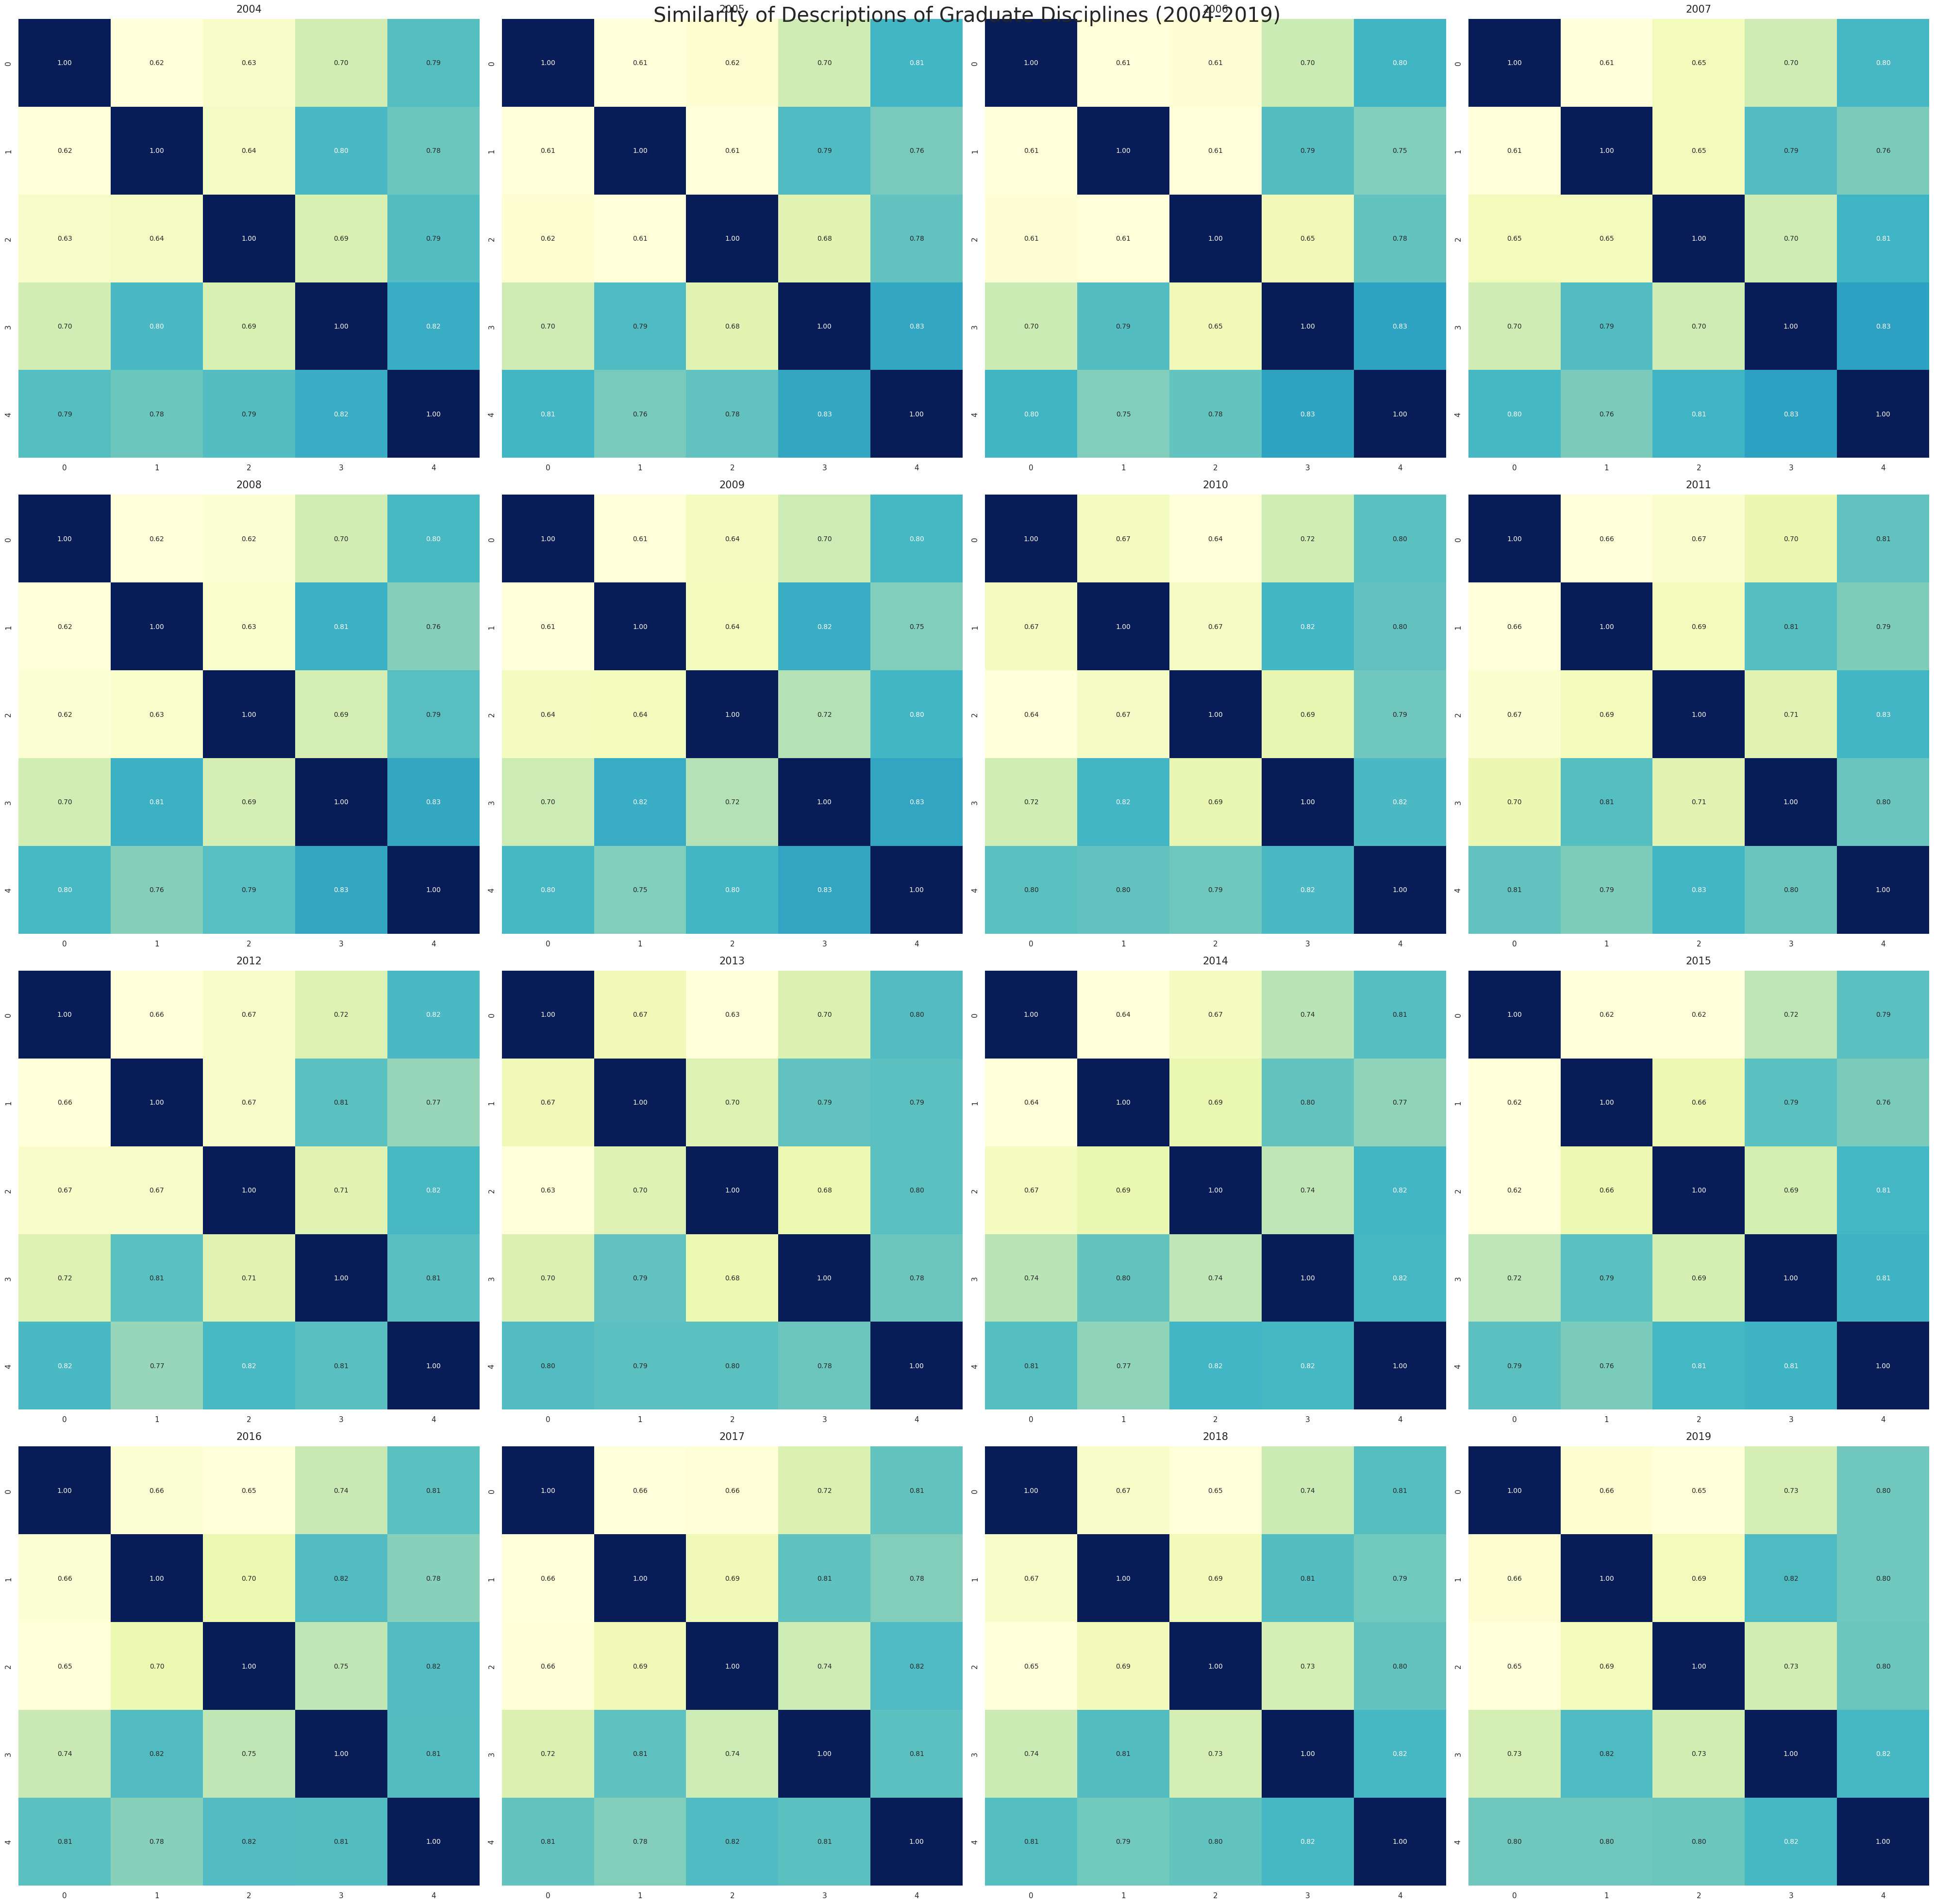

In [23]:
labels = ['Arts and\nHumanities', 'Engineering and\nTechnology', 
          'Medicine and\nHealth Sciences', 'Natural\nSciences', 'Social\nSciences']

fig, axes = plt.subplots(4, 4, figsize=(40, 40))  # Create a 4x4 grid for subplots

for i, year in enumerate(range(2004, 2020)):
    documents = eval(f'documents_grad_{year}')  # Dynamically get the list of documents for the year
    tfidfv = TfidfVectorizer().fit(documents)  # Fit the vectorizer to the documents
    tfidf_matrix = tfidfv.transform(documents).toarray()  # Transform the documents to a TF-IDF matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)  # Calculate the cosine similarity matrix
    
    row, col = divmod(i, 4)
    
    # Plot the heatmap on the corresponding subplot
    ax = sns.heatmap(cosine_sim_matrix, annot=True, cmap='YlGnBu', fmt=".2f", 
                     annot_kws={"size": 10},ax=axes[row][col], cbar=False)
    ax.set_title(f"{year}", fontsize=15, pad=10)  # Set the title for each heatmap

# Add a main title for the entire figure
fig.suptitle("Similarity of Descriptions of Graduate Disciplines (2004-2019)", fontsize=30)
plt.tight_layout()
plt.show()

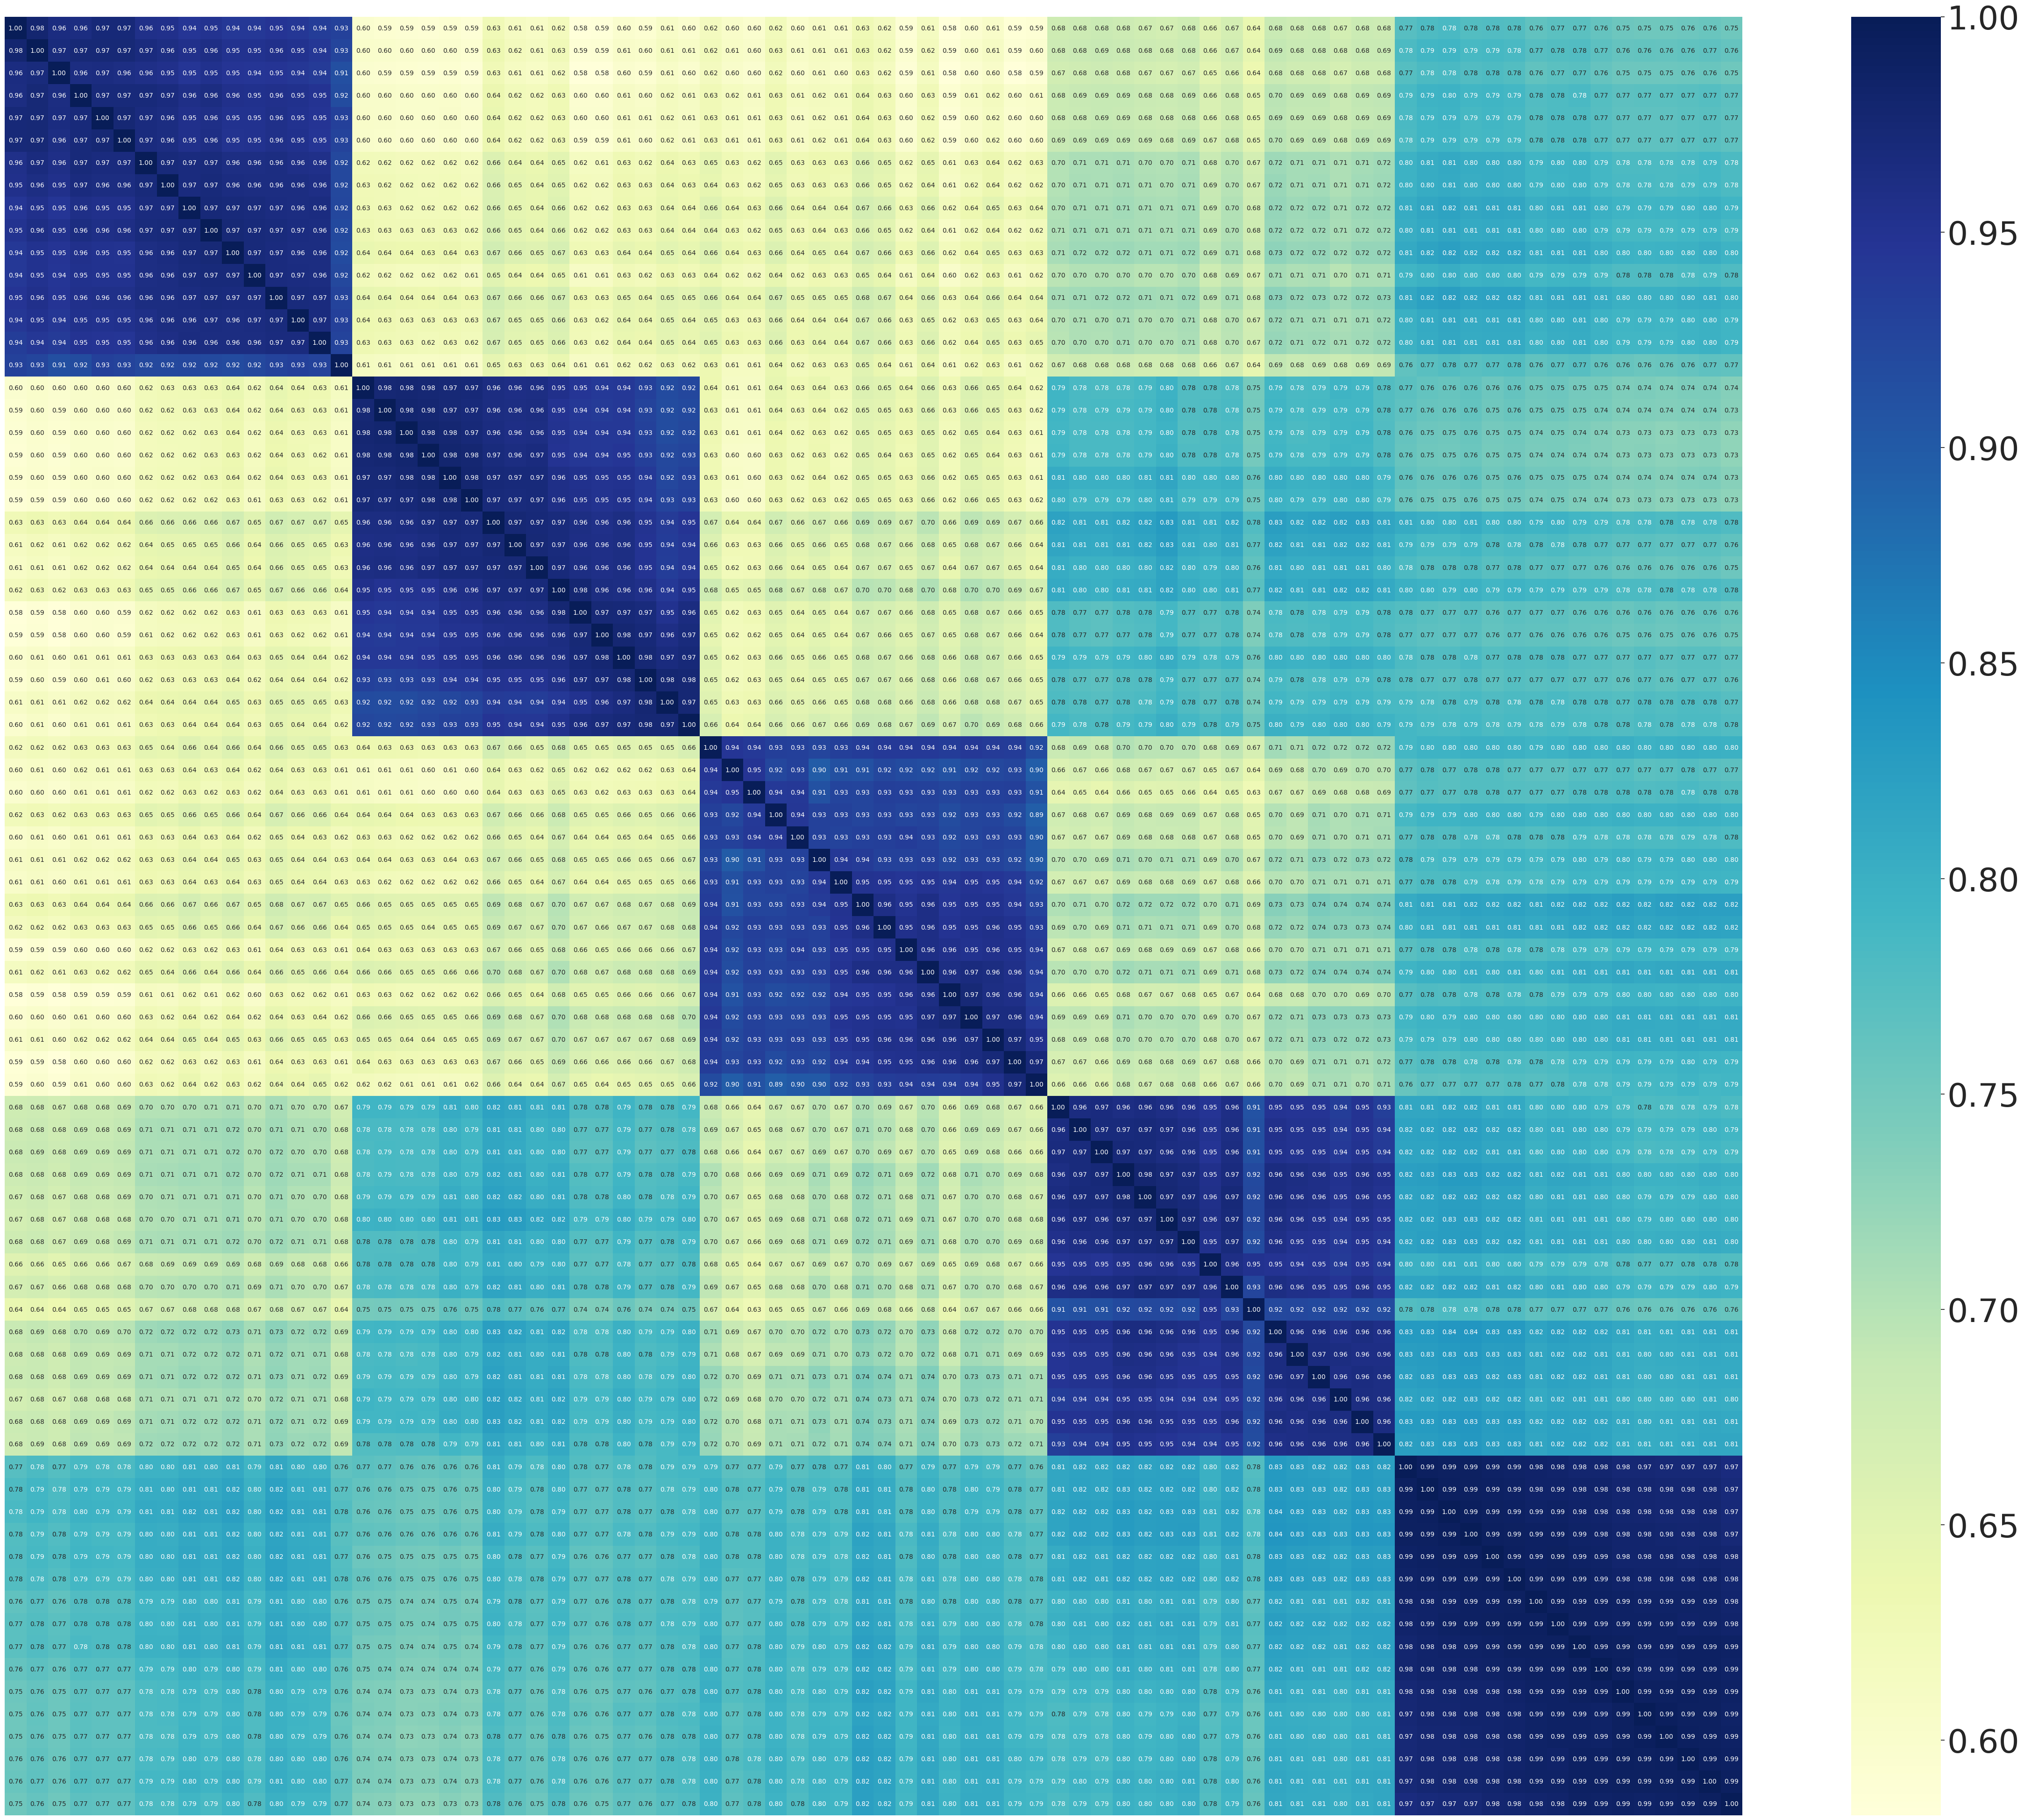

In [18]:
# TF-IDF
corpus2 = documents_grad
tfidfv2 = TfidfVectorizer().fit(corpus2)
tfidf_matrix2 =tfidfv2.transform(corpus2).toarray()
cosine_sim_matrix_TFIDF2 = cosine_similarity(tfidf_matrix2, tfidf_matrix2)

labels = ['Arts and\nHumanities', 'Engineering and\nTechnology', 
          'Medicine and\nHealth Sciences', 'Natural\nSciences', 'Social\nSciences']

plt.figure(figsize=(60,50)) 
heatmap = sns.heatmap(cosine_sim_matrix_TFIDF2, annot=True, cmap='YlGnBu', fmt=".2f",
                      xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=50)
plt.xticks([])
plt.yticks([])
plt.show()

# Temporal changes in topic composition using STM

In [24]:
stm = pd.read_csv("./STM/240227_OpenSyllabus_topic_document.csv")

In [25]:
cols = ['Natural_Sciences', 'Arts_and_Humanities', 'Social_Sciences',
       'Engineering_and_Technology', 'Medicine_and_Health_Sciences','Total']

for col in cols:
    stm[col] = 0

categories = {
    'Arts_and_Humanities': ['topic3', 'topic5', 'topic12'],
    'Engineering_and_Technology': ['topic10', 'topic13'],
    'Medicine_and_Health_Sciences': ['topic4'],
    'Natural_Sciences': ['topic1', 'topic7', 'topic8'],
    'Social_Sciences': ['topic9', 'topic11', 'topic14', 'topic2'],
    'Total': ['topic3', 'topic5', 'topic12','topic10', 'topic13','topic4',
              'topic1', 'topic7', 'topic8','topic9', 'topic11', 'topic14', 'topic2']
}

# For each category, sum the relevant topics' values for each row
for category, topics in categories.items():
    stm[category] = stm[topics].sum(axis=1) 
    
for category, topics in categories.items():
    stm[category] = stm[category]/stm['Total'] 

stm.head()


topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.527446  0.011857  0.001527  0.008708  0.004073  0.121453  0.078130   
1  0.002639  0.262931  0.017190  0.004580  0.270355  0.192318  0.001943   
2  0.004805  0.012789  0.075665  0.002070  0.182603  0.528120  0.000550   
3  0.004413  0.182101  0.018740  0.017265  0.002711  0.047737  0.003762   
4  0.006595  0.002104  0.482363  0.005563  0.005598  0.017754  0.007241   

     topic8    topic9   topic10  ...   topic15             category  year  \
0  0.072926  0.022137  0.023296  ...  0.045656     Natural Sciences  2004   
1  0.005095  0.021092  0.006431  ...  0.054119  Arts and Humanities  2004   
2  0.014110  0.010060  0.003247  ...  0.095442  Arts and Humanities  2004   
3  0.007012  0.176914  0.014788  ...  0.059877      Social Sciences  2004   
4  0.028283  0.012154  0.087001  ...  0.081650     Natural Sciences  2004   

               id  Natural_Sciences Arts_and_Humanities  Social_Sciences  \
0   6262062326506          0.814635            0.018743         0.052161   
1   6966436956976          0.012843            0.534130         0.381635   
2  11665131195894          0.051710            0.835641         0.073419   
3  15590731307182          0.017018            0.030218         0.913336   
4   1735166804574          0.046768            0.543127         0.305313   

   Engineering_and_Technology  Medicine_and_Health_Sciences  Total  
0                    0.104005                      0.010455    1.0  
1                    0.065315                      0.006078    1.0  
2                    0.033730                      0.005500    1.0  
3                    0.020080                      0.019347    1.0  
4                    0.098615                      0.006177    1.0  

[5 rows x 24 columns]

In [26]:
# Assuming grouped_df is your grouped DataFrame
grouped_df = stm.groupby(['category','year'])[['Natural_Sciences', 'Arts_and_Humanities', 'Social_Sciences',
       'Engineering_and_Technology', 'Medicine_and_Health_Sciences']].mean().reset_index()

# Pivot the data for easier plotting: Categories as rows, years as columns, topics as sub-columns
pivot_df = grouped_df.pivot_table(index=['category', 'year'], values=['Natural_Sciences', 'Arts_and_Humanities', 'Social_Sciences',
       'Engineering_and_Technology', 'Medicine_and_Health_Sciences'])

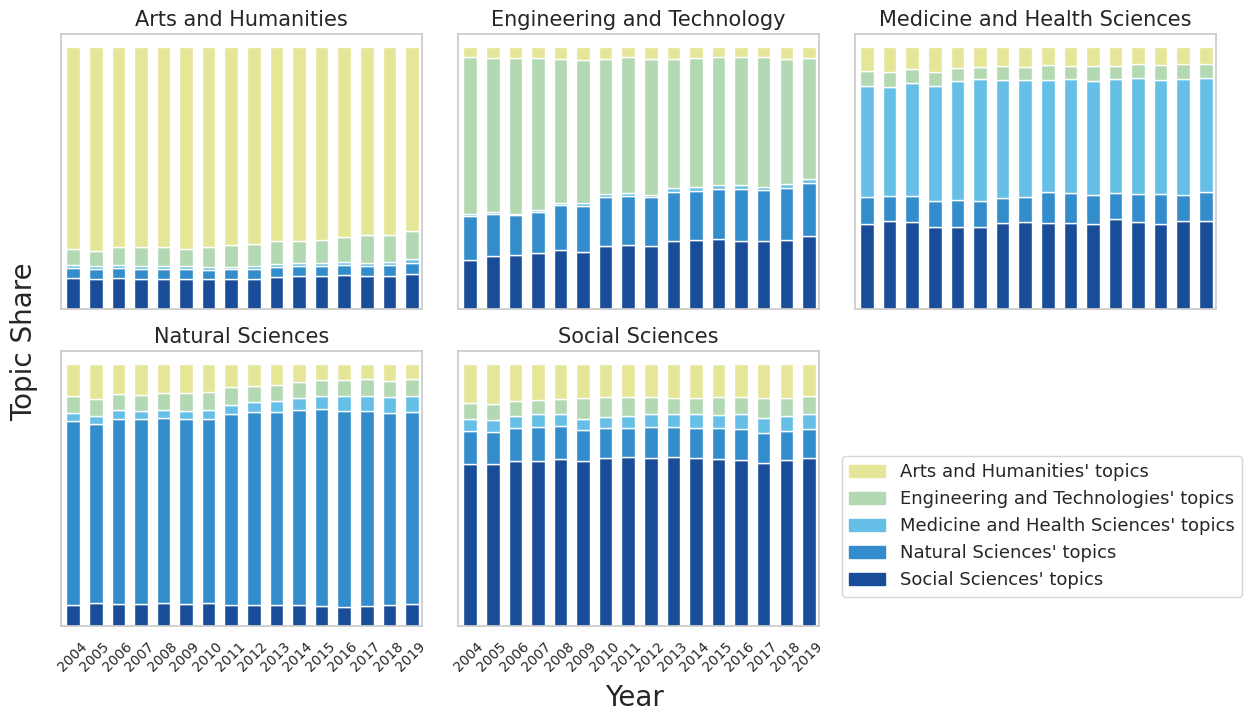

In [27]:
categories = pivot_df.index.get_level_values(0).unique()
years = list(range(2004, 2020))

n = len(categories)
ncols = 3 
nrows = n // ncols + (n % ncols > 0)  

colors = [
    (0.9, 0.9, 0.6),  
    (0.7, 0.85, 0.7), 
    (0.4, 0.75, 0.9), 
    (0.2, 0.55, 0.8), 
    (0.1, 0.3, 0.6),  
]

custom_cmap = LinearSegmentedColormap.from_list("CustomYlGnBu", colors, N=5)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3.5))  
axes = axes.flatten()  

for i, category in enumerate(categories):
    category_df = pivot_df.xs(category, level=0)
    category_df = category_df[category_df.columns[::-1]]
    ax = category_df.plot(kind='bar', stacked=True,colormap=custom_cmap.reversed(), ax=axes[i])
    
    # bar_width 
    for bar in ax.patches:
        bar.set_width(0.6)  
    
    axes[i].set_title(f"{category}",fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels([])
    axes[i].set_ylabel('')
    axes[i].set_yticklabels([])
    
    if i // ncols == 1:
        axes[i].set_xticklabels(years, rotation=45, fontsize=10)
    
    axes[i].legend().set_visible(False)
    axes[i].grid(False)


for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

handles, labels = ax.get_legend_handles_labels()
custom_labels = ["Arts and Humanities' topics", 
                 "Engineering and Technologies' topics",
                 "Medicine and Health Sciences' topics", 
                 "Natural Sciences' topics", 
                 "Social Sciences' topics"]

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
fig.legend(handles, custom_labels, title='', title_fontsize=13, fontsize=13, loc='upper center', bbox_to_anchor=(0.84, 0.35), ncol=1)

fig.text(0.5, -0.02, 'Year', ha='center', fontsize=20)  # X-axis label (for the figure as a whole)
fig.text(-0.02, 0.5, 'Topic Share', va='center', rotation='vertical', fontsize=20)  # Y-axis label


plt.tight_layout()
plt.show()


## HHI

### HHI index for all the topics in average

In [29]:
stm['hhi']=""

In [30]:
shares = stm.iloc[:, 18:23]
stm['hhi'] = (shares ** 2).sum(axis=1)

average_hhi = stm.groupby(['category', 'year'])['hhi'].mean()
df_pivoted = average_hhi.unstack(level=0) 

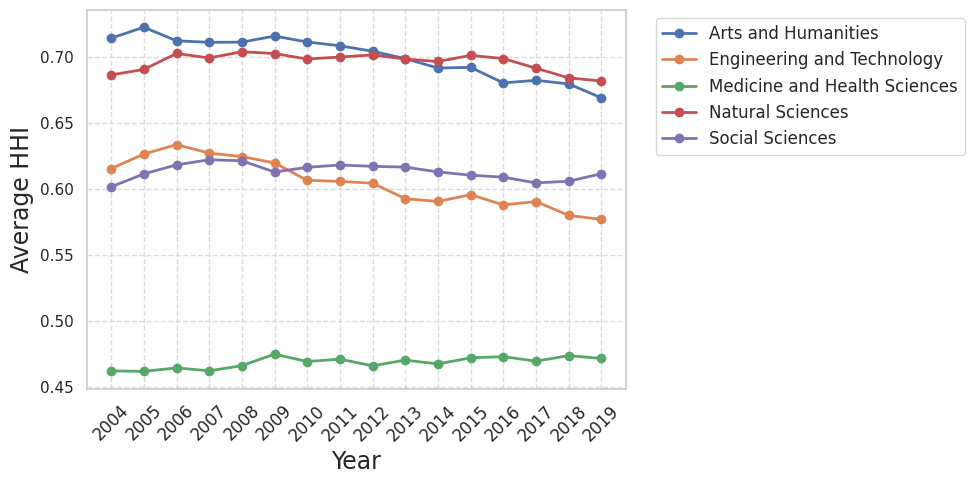

In [31]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))

for category in df_pivoted.columns:
    plt.plot(df_pivoted.index, df_pivoted[category], label=category, marker='o', linewidth=2)

plt.xlabel('Year', fontsize=17)
plt.ylabel('Average HHI', fontsize=17)

plt.xticks(df_pivoted.index, rotation=45, fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), title_fontsize='large', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()


### HHI index for top topic

In [32]:
stm['top_topic'] =""

target_columns = [
    "Natural_Sciences", 
    "Arts_and_Humanities", 
    "Social_Sciences", 
    "Engineering_and_Technology", 
    "Medicine_and_Health_Sciences"
]

stm['top_topic'] = stm[target_columns].idxmax(axis=1)

In [37]:
stm.columns

Index(['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7',
       'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13',
       'topic14', 'topic15', 'category', 'year', 'id', 'Natural_Sciences',
       'Arts_and_Humanities', 'Social_Sciences', 'Engineering_and_Technology',
       'Medicine_and_Health_Sciences', 'Total', 'hhi', 'top_topic'],
      dtype='object')

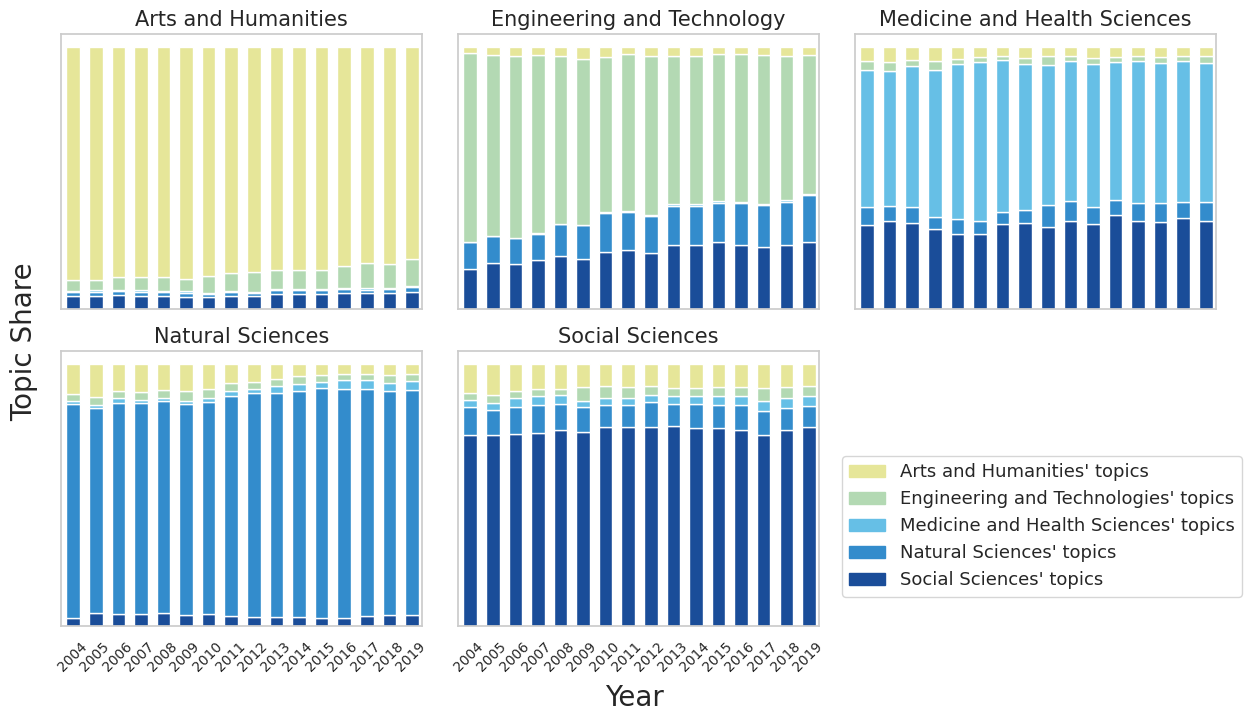

In [43]:
stm_toptopic = stm.groupby(['category','year'])['top_topic'].value_counts(normalize=True)
categories = sorted(stm['category'].unique())

proportion_df = stm_toptopic.reset_index(name='Proportion')
stacked_data = proportion_df.pivot_table(
    index=['year'],
    columns=['category', 'top_topic'],
    values='Proportion',
    fill_value=0
)
n = len(categories)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Custom colormap for consistent styling
colors = [
    (0.9, 0.9, 0.6),  
    (0.7, 0.85, 0.7), 
    (0.4, 0.75, 0.9), 
    (0.2, 0.55, 0.8), 
    (0.1, 0.3, 0.6),
]
custom_cmap = LinearSegmentedColormap.from_list("CustomYlGnBu", colors, N=5)

# Create figure and axes
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3.5))
axes = axes.flatten()

# Plot stacked bar graphs for each category
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = stacked_data[category]
    category_data = category_data[category_data.columns[::-1]]  # Reverse columns for stacking order

    # Plot stacked bar chart
    ax = category_data.plot(kind='bar', stacked=True, colormap=custom_cmap.reversed(), ax=axes[i])
    
    # Customize bar width
    for bar in ax.patches:
        bar.set_width(0.6)
    
    # Add title and customize subplot
    axes[i].set_title(category, fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels([])
    axes[i].set_ylabel('')
    axes[i].set_yticklabels([])
    
    # Add x-tick labels for middle row
    if i // ncols == 1:
        axes[i].set_xticklabels(years, rotation=45, fontsize=10)
    
    # Hide legend for individual subplots
    axes[i].legend().set_visible(False)
    axes[i].grid(False)

# Remove unused subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
custom_labels = [
    "Arts and Humanities' topics", 
    "Engineering and Technologies' topics",
    "Medicine and Health Sciences' topics", 
    "Natural Sciences' topics", 
    "Social Sciences' topics"
]
fig.legend(handles, custom_labels, title='', title_fontsize=13, fontsize=13, loc='upper center', bbox_to_anchor=(0.84, 0.35), ncol=1)

# Add global x and y axis labels
fig.text(0.5, -0.02, 'Year', ha='center', fontsize=20)  # X-axis label
fig.text(-0.02, 0.5, 'Topic Share', va='center', rotation='vertical', fontsize=20)  # Y-axis label

# Final adjustments
plt.tight_layout()
plt.show()

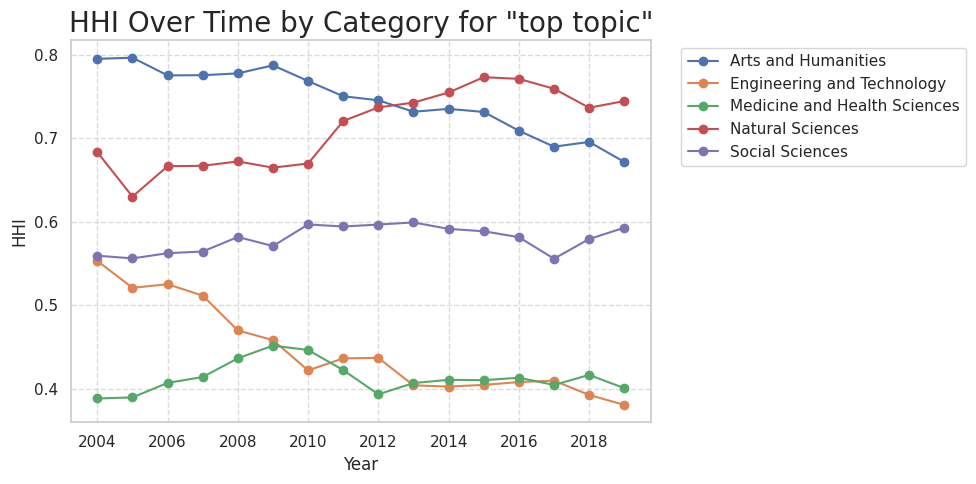

In [47]:
# Step 1: Aggregate HHI Data
hhi_data = []
categories = sorted(stm['category'].unique())

for category in categories:
    for year in range(2004, 2020):
        shares = stm[(stm['year'] == year) & (stm['category'] == category)]['top_topic'].value_counts(normalize=True)
        hhi = sum([share**2 for share in shares]) 
        
        hhi_data.append({'Category': category, 'Year': year, 'HHI': hhi})

# Step 2: Create a DataFrame
hhi_df = pd.DataFrame(hhi_data)

# Step 3: Plot the Data
plt.figure(figsize=(10,5))

sns.set_theme(style="whitegrid")
plt.grid(True, linestyle='--', alpha=0.7)

for category in hhi_df['Category'].unique():
    subset = hhi_df[hhi_df['Category'] == category]
    plt.plot(subset['Year'], subset['HHI'], label=category, marker="o")

plt.xlabel('Year')
plt.ylabel('HHI')
plt.title('HHI Over Time by Category for "top topic"',fontsize=20)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.grid(True)
plt.tight_layout() 
plt.show()


# Temporal changes in educational goals

In [48]:
peda = pd.read_csv("./lemmatized_learningoutcomes.csv")
peda2 = peda.dropna(subset=['learning_outcomes']).reset_index()  

grouped_outcomes = peda2.groupby(['category', 'year'])['lemmatized_outcomes'].agg(list).reset_index()
grouped_outcomes.head()

category  year  \
0  Arts and Humanities  2004   
1  Arts and Humanities  2005   
2  Arts and Humanities  2006   
3  Arts and Humanities  2007   
4  Arts and Humanities  2008   

                                 lemmatized_outcomes  
0  [['acquire', 'develop', 'align', 'demonstrate'...  
1  [['make', 'involve', 'define', 'explore', 'lin...  
2  [['engage', 'select', 'demonstrate', 'select',...  
3  [['identify', 'understand', 'compare', 'expres...  
4  [['complete', 'speak', 'involve', 'observe', '...

In [49]:
# 241120 Version

data_dict = {
    "remember": ['arrange', 'choose', 'cite', 'copy', 'define', 'describe', 'detail', 
                 'draw', 'duplicate', 'enumerate', 'examine', 'identify', 'indicate', 
                 'inventory', 'label', 'list', 'locate', 'match', 'memorize', 'name', 
                 'observe', 'omit', 'order', 'outline', 'pick', 'point', 'pronounce', 
                 'quote', 'read', 'recall', 'recite', 'recognize', 'record', 'relate', 
                 'repeat', 'reproduce', 'restate', 'review', 'select', 'state', 'tabulate', 
                 'tell', 'underline', 'visualize', 'write'],
    
    "understand": ['articulate', 'ask', 'associate', 'characterize', 'cite', 'clarify', 'classify', 
                   'compare', 'confirm', 'contrast', 'convert', 'decipher', 'defend', 'demonstrate', 
                   'describe', 'designate', 'differentiate', 'discover', 'discuss', 'distinguish', 
                   'equate', 'estimate', 'examine', 'explain', 'express', 'extend', 'extrapolate', 
                   'generalize', 'give', 'give examples', 'group', 'identify', 'illustrate', 'indicate', 
                   'infer', 'interpolate', 'interpret', 'judge', 'locate', 'match', 'observe', 'order', 
                   'organize', 'paraphrase', 'predict', 'recognize', 'relate', 'rephrase', 'report', 
                   'represent', 'research', 'restate', 'review', 'rewrite', 'select', 'show', 'sort', 
                   'specify', 'substitute', 'summarize', 'tell', 'trace', 'transform', 'translate'],
    
    "apply": ['act', 'adapt', 'add', 'administer', 'allocate', 'alter', 'apply', 'articulate', 'back', 
              'back up', 'calculate', 'change', 'chart', 'choose', 'classify', 'collect', 'complete', 
              'compute', 'conduct', 'construct', 'coordinate', 'demonstrate', 'determine', 'develop', 
              'direct', 'discover', 'divide', 'dramatize', 'draw', 'employ', 'establish', 'examine', 
              'experiment', 'explain', 'formulate', 'gather', 'generalize', 'graph', 'identify', 'illustrate', 
              'implement', 'interpret', 'interview', 'judge', 'make', 'manipulate', 'model', 'modify', 
              'multiply', 'operate', 'organize', 'paint', 'perform', 'practice', 'predict', 'prepare', 
              'present', 'produce', 'provide', 'record', 'recount', 'relate', 'report', 'schedule', 
              'select', 'show', 'simulate', 'sketch', 'solve', 'subtract', 'teach', 'transfer', 'translate', 'use', 'utilize', 'write'],
    
    "analyze": ['advertise', 'analyze', 'appraise', 'associate', 'break', 'break down', 'calculate', 
                'categorize', 'classify', 'compare', 'conclude', 'connect', 'contrast', 'correlate', 
                'criticize', 'debate', 'deduce', 'detect', 'devise', 'diagnose', 'diagram', 'differentiate', 
                'discern', 'discover', 'discriminate', 'dissect', 'distinguish', 'divide', 'elect', 
                'establish', 'estimate', 'evaluate', 'examine', 'experiment', 'explain', 'expound', 
                'figure', 'focus', 'group', 'identify', 'illustrate', 'infer', 'inspect', 'inventory', 
                'investigate', 'order', 'organize', 'outline', 'plan', 'point out', 'predict', 'prioritize', 
                'profile', 'question', 'refute', 'relate', 'select', 'separate', 'simplify', 'solve', 
                'subdivide', 'summarize', 'survey', 'test'],
    
    "evaluate": ['appraise', 'argue', 'arrange', 'assess', 'attach', 'attack', 'choose', 'compare', 
                 'compare and contrast', 'conclude', 'consider', 'contrast', 'convince', 'core', 'counsel', 
                 'create', 'criticize', 'critique', 'debate', 'decide', 'deduce', 'defend', 'describe', 
                 'design', 'determine', 'diagnose', 'discriminate', 'distinguish', 'editorialize', 'estimate', 
                 'evaluate', 'explain', 'find errors', 'forecast', 'grade', 'improve', 'invent', 'judge', 
                 'justify', 'manage', 'measure', 'mediate', 'order', 'persuade', 'predict', 'prepare', 
                 'prioritize', 'probe', 'prove', 'rank', 'rate', 'rearrange', 'recommend', 'reconcile', 
                 'reframe', 'release', 'resolve', 'revise', 'rewrite', 'score', 'select', 'set up', 'solve', 
                 'summarize', 'supervise', 'support', 'synthesize', 'test', 'value', 'verify', 'weigh'],
    
    "create": ['adapt', 'anticipate', 'arrange', 'assemble', 'assimilate', 'categorize', 'choose', 'collaborate', 
               'collect', 'combine', 'compile', 'compose', 'condense', 'construct', 'create', 'derive', 'design', 
               'develop', 'devise', 'elaborate', 'estimate', 'evaluate', 'expand', 'explain', 'express', 'facilitate', 
               'formulate', 'generalize', 'generate', 'guide', 'hypothesize', 'improve', 'infer', 'integrate', 
               'intervene', 'invent', 'justify', 'make', 'manage', 'modify', 'negotiate', 'organize', 'originate', 
               'plan', 'predict', 'prepare', 'prescribe', 'produce', 'propose', 'rate', 'rearrange', 'reconstruct', 
               'relate', 'reorganize', 'report', 'revise', 'rework', 'rewrite', 'role-play', 'set up', 'simulate', 
               'solve', 'specify', 'speculate', 'structure', 'summarize', 'synthesize', 'tell', 'tell why', 'test', 
               'theorize', 'transform', 'validate', 'write']
}

In [50]:
all_words = [word for words in data_dict.values() for word in words]
word_count = Counter(all_words)

In [51]:
# weight

weights = {}

for word in set(all_words):
    word_weight = round((1 / word_count[word]), 2)  # Calculate the weight
    weights[word] = word_weight  # Store in the dictionary

In [52]:
many_words =[]
one_words_list=[]
many_words_list = [item[0] for item in many_words]

for word, count in word_count.items():
    if count > 1:
        many_words.append((word,count))
    else:
        one_words_list.append(word)

print("Number of words appearing only once:", len(one_words_list))
print("Number of words appearing two or more times:", len(many_words))
print("Top 10 most frequently occurring words:", word_count.most_common(90))

Number of words appearing only once: 168
Number of words appearing two or more times: 90
Top 10 most frequently occurring words: [('relate', 5), ('select', 5), ('explain', 5), ('predict', 5), ('choose', 4), ('examine', 4), ('identify', 4), ('order', 4), ('estimate', 4), ('organize', 4), ('summarize', 4), ('solve', 4), ('arrange', 3), ('describe', 3), ('tell', 3), ('write', 3), ('classify', 3), ('compare', 3), ('contrast', 3), ('discover', 3), ('distinguish', 3), ('generalize', 3), ('illustrate', 3), ('infer', 3), ('judge', 3), ('report', 3), ('rewrite', 3), ('prepare', 3), ('evaluate', 3), ('test', 3), ('cite', 2), ('draw', 2), ('indicate', 2), ('inventory', 2), ('locate', 2), ('match', 2), ('observe', 2), ('outline', 2), ('recognize', 2), ('record', 2), ('restate', 2), ('review', 2), ('articulate', 2), ('associate', 2), ('defend', 2), ('demonstrate', 2), ('differentiate', 2), ('express', 2), ('group', 2), ('interpret', 2), ('show', 2), ('specify', 2), ('transform', 2), ('translate', 2

## Counting all the levels of word occurrences

In [53]:
def find_all(word, data_dict):
    new_word = []
    found = False  # Flag to track if the word is found in any level
    for level, words in data_dict.items():
        if word in words:
            new_word.append(level)
            found = True
    return new_word, found  # Return both the levels and whether the word was found

all_words_dic = {}
new_words_dic = {}
unselected = []  # Keeping unselected as a list

for i in range(len(grouped_outcomes)):
    lists = grouped_outcomes['lemmatized_outcomes'][i]
    category_name = grouped_outcomes['category'][i]
    year = grouped_outcomes['year'][i]
    all_words = []
    level_mappings = []

    for string_list in lists:
        # Consider using ast.literal_eval for safer execution if eval is necessary
        python_list = eval(string_list)
        all_words.extend(python_list)

    for word in all_words:
        levels_for_word, found = find_all(word, data_dict)
        if not found:
            unselected.append(word)  
        level_mappings.extend(levels_for_word)

    # Count words
    word_counts = Counter(all_words)
    level_counts = Counter(level_mappings)

    # Store the counts
    all_words_dic[f'{category_name}_{year}'] = word_counts
    new_words_dic[f'{category_name}_{year}'] = level_counts


## Weighting by the Occurences

In [54]:
level_weights = defaultdict(lambda: defaultdict(float))  # Nested dictionary for category-year

for i in range(len(grouped_outcomes)):
    lists = grouped_outcomes['lemmatized_outcomes'][i]
    category_name = grouped_outcomes['category'][i]
    year = grouped_outcomes['year'][i]
    category_year = f"{category_name}_{year}"  # Unique key for each category-year

    all_words = []  # Reset for each iteration
    for string_list in lists:
        python_list = eval(string_list)
        all_words.extend(python_list)
    
    for word in all_words:
        for level in find_all(word, data_dict)[0]:
            level_weights[category_year][level] += weights.get(word, 0)  # Accumulate weights for the level

# Convert defaultdict to a regular dict if needed
level_weights = {key: dict(value) for key, value in level_weights.items()}

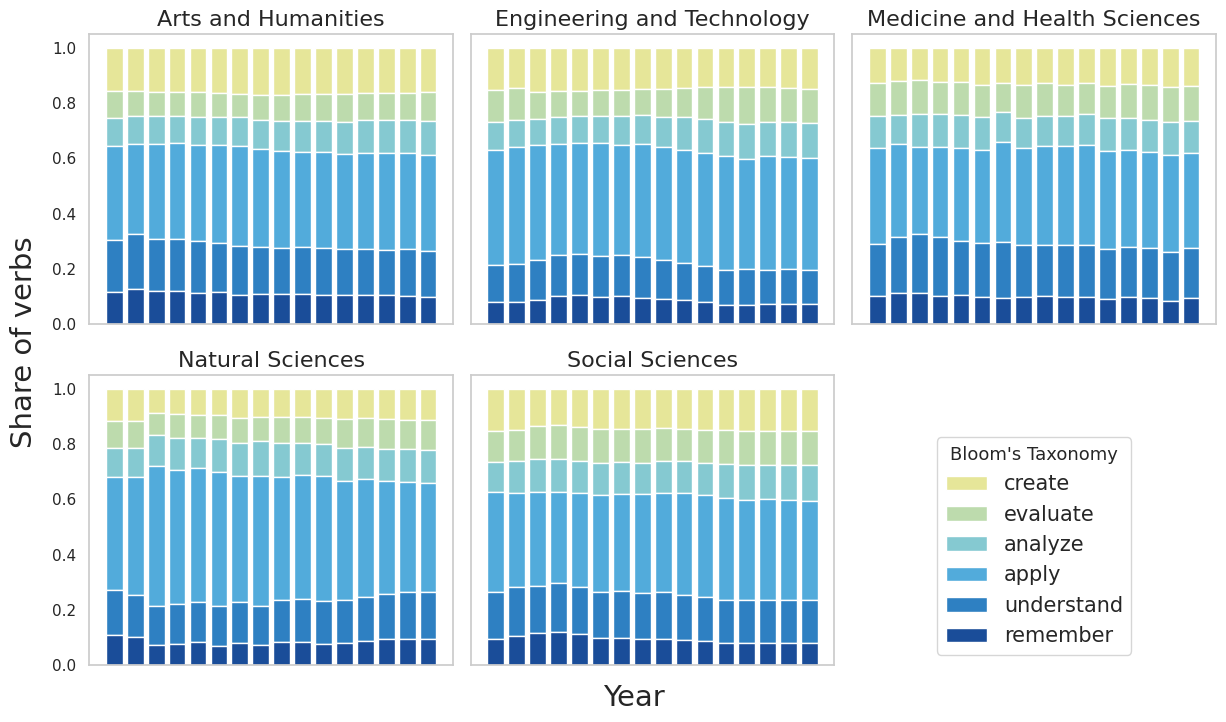

In [213]:
proportion_weights = {}

for category_year, levels in level_weights.items():
    total_weight = sum(levels.values())
    if total_weight > 0:  # Avoid division by zero
        proportion_weights[category_year] = {level: weight / total_weight for level, weight in levels.items()}
    else:
        proportion_weights[category_year] = {level: 0 for level in levels}  # Handle zero weights


categories_years = defaultdict(lambda: defaultdict(dict))

for cat_year, levels in proportion_weights.items():
    category, year = cat_year.rsplit('_', 1)
    categories_years[category][year] = levels

colors = [
    (0.9, 0.9, 0.6),  
    (0.7, 0.85, 0.7), 
    (0.4, 0.75, 0.9), 
    (0.2, 0.55, 0.8), 
    (0.1, 0.3, 0.6),  
]

custom_cmap = LinearSegmentedColormap.from_list("CustomYlGnBu", colors, N=6)

# colormap = cm.get_cmap('YlGnBu', 6)  # 6 discrete colors for 6 levels
levels = ['create', 'evaluate', 'analyze', 'apply', 'understand', 'remember']
colors = [custom_cmap(i) for i in range(len(levels))]

# Adjust the number of rows and columns for subplots
num_categories = len(categories_years)
fig, axs = plt.subplots(2, 3, figsize=(12, 7), sharex=True, sharey=True)

# Flatten the axs array for easier indexing
axs = axs.flatten()

for idx, (category, years) in enumerate(categories_years.items()):
    ax = axs[idx]
    
    years_sorted = sorted(years.keys())
    levels = ['create', 'evaluate', 'analyze', 'apply', 'understand', 'remember']
    
    bar_data = {level: [years[year].get(level, 0) for year in years_sorted] for level in levels}
    x = np.arange(len(years_sorted))
    bar_width = 0.8

    top = np.ones(len(years_sorted))
    for color, level in zip(colors, levels):
        ax.bar(x, bar_data[level], bar_width, label=level,color=color, bottom=top - bar_data[level])
        top -= bar_data[level]
    
    # Customizing each subplot
    ax.set_title(f"{category}", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(years_sorted, rotation=45, ha='right')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.grid(False)

# Hide unused subplots
for ax in axs[num_categories:]:
    ax.axis('off')

# Adding shared labels and legend
fig.text(0.5, -0.02, 'Year', ha='center', fontsize=21)  # X-axis label
fig.text(-0.02, 0.5, 'Share of verbs', va='center', rotation='vertical', fontsize=21)  # Y-axis label
      
handles, labels = axs[0].get_legend_handles_labels()
axs[5].legend(handles, labels, title="Bloom's Taxonomy",title_fontsize=13, fontsize=15, loc='lower center') 
axs[5].axis('off')

plt.tight_layout()
plt.show()

In [176]:
grouped_outcomes['lemmatized_outcomes_level']= ""

In [177]:
proportions_dict_6words = {}

words6 = ["create", "evaluate", "analyze", "apply", "understand", "remember"]

for item in new_words_dic.keys():
    word_counts = Counter(new_words_dic[item])
    words6_count = {word: word_counts.get(word, 0) for word in words6}  
    total = sum(word_counts.values())
    total_count = sum(words6_count.values())  
    if total_count > 0:  
        proportions = [(word, count / total_count) for word, count in words6_count.items()]
    else:
        proportions = [(word, 0) for word in words6]  
    
    proportions_dict_6words[item] = proportions

In [178]:
Natural_Sciences = {}
Arts_and_Humanities = {}
Social_Sciences = {}
Engineering_and_Technology = {}
Medicine_and_Health_Sciences = {}

for key, value in proportions_dict_6words.items():
    if "Natural Sciences" in key:
        Natural_Sciences[key] = value
    elif "Arts and Humanities" in key:
        Arts_and_Humanities[key] = value
    elif "Social Sciences" in key:
        Social_Sciences[key] = value
    elif "Engineering and Technology" in key:
        Engineering_and_Technology[key] = value
    elif "Medicine and Health Sciences" in key:
        Medicine_and_Health_Sciences[key] = value


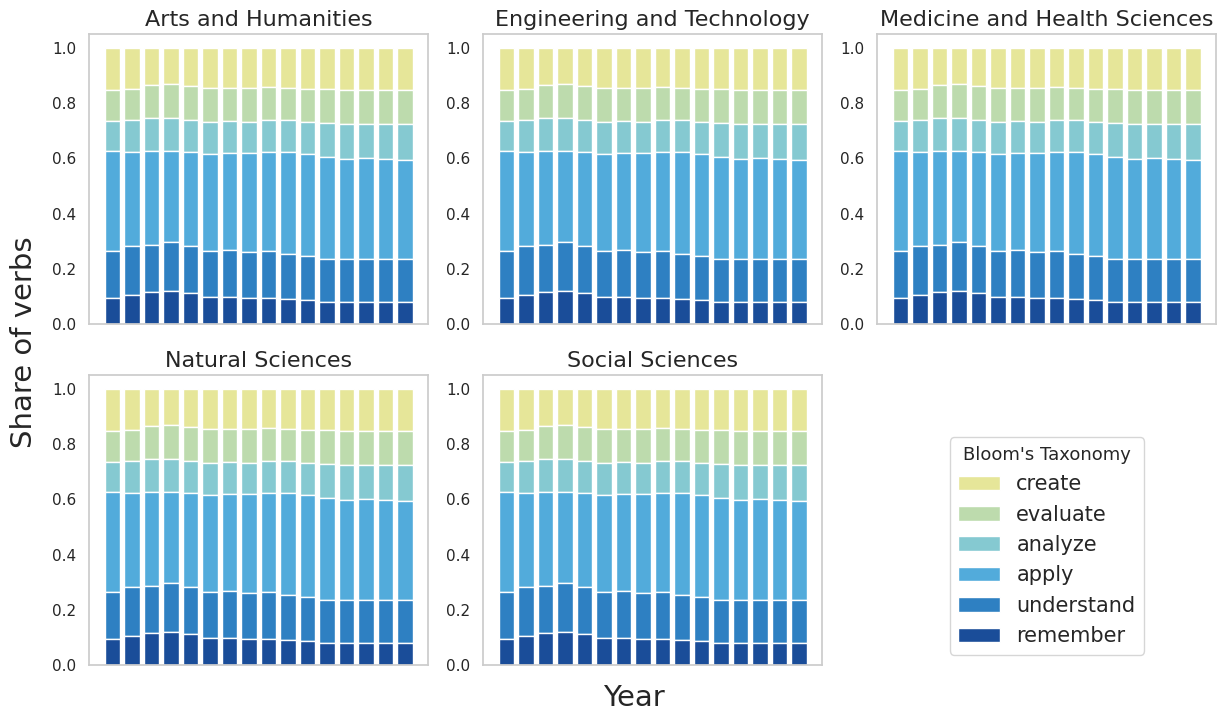

In [216]:
categories_dict = {
    "Arts and Humanities": Arts_and_Humanities,   
    "Engineering and Technology": Engineering_and_Technology,
    "Medicine and Health Sciences": Medicine_and_Health_Sciences,
    "Natural Sciences": Natural_Sciences,
    "Social Sciences": Social_Sciences
}

word_order = ['remember', 'understand', 'apply', 'analyze', 'evaluate', 'create']
colors = [
    (0.9, 0.9, 0.6),  # 연한 노란색
    (0.7, 0.85, 0.7), # 연한 녹색
    (0.4, 0.75, 0.9), # 청록색
    (0.2, 0.55, 0.8), # 중간 파란색
    (0.1, 0.3, 0.6),  # 어두운 파란색
]

# 커스텀 색상 맵 생성
custom_cmap = LinearSegmentedColormap.from_list("CustomYlGnBu", colors, N=6)
levels = ['create', 'evaluate', 'analyze', 'apply', 'understand', 'remember']
colors = [custom_cmap(i) for i in range(len(levels))]


fig, axs = plt.subplots(2, 3, figsize=(12,7))  
axs = axs.flatten()  

keep_indices = [0, 3]  # Adjust indices based on your layout
        
for ax_idx, (category_name, categories) in enumerate(categories_dict.items()):
    ax = axs[ax_idx]
    all_words = set(word for proportions in proportions_dict_6words.values() for word, _ in proportions)
    data = {word: [] for word in all_words}
    for word in all_words:
        for category in categories:
            proportion = next((prop for w, prop in proportions_dict_6words[category] if w == word), 0)
            data[word].append(proportion)

    category_indices = np.arange(len(categories))
    # colors = [colormap(i * color_step) for i in range(len(word_order))]
    bottoms = np.zeros(len(categories))

    # for word in levels:
    #     proportions = data[word]
    #     ax.bar(category_indices, proportions, bottom=bottoms, color=colors[levels.index(word)], label=word, edgecolor='white', width=0.6)
    #     bottoms += proportions
        
    top = np.ones(len(years_sorted))
    for color, level in zip(colors, levels):
        ax.bar(x, bar_data[level], bar_width, label=level,color=color, bottom=top - bar_data[level])
        top -= bar_data[level]

    ax.set_title(f'{category_name}', fontsize=16)
    ax.set_xticks(x)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # x-축 틱 숨김
    # ax.tick_params(axis='y', labelsize=8)
    
    ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
axs[5].legend(handles, labels, title="Bloom's Taxonomy",title_fontsize=13, fontsize=15, loc='lower center')  # 마지막 서브플롯에 범례 추가
axs[5].axis('off')

fig.text(0.5, -0.02, 'Year', ha='center', fontsize=21)  # X-axis label
fig.text(-0.02, 0.5, 'Share of verbs', va='center', rotation='vertical', fontsize=21)  # Y-axis label
plt.tight_layout()
plt.show()
